# Usual imports, load data

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from matplotlib import pyplot as plt
plt.style.use("ggplot")

In [ ]:
from keras.datasets import cifar10
import numpy as np

Using TensorFlow backend.
/home/root1/.virtualenv/demos/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data() 

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_train = X_train[:5000,:,:]
y_train = y_train[:5000]

In [ ]:
print X_train.shape
print y_train.shape

(5000, 32, 32, 3)
(5000, 1)


In [ ]:
X_test = X_test[:5000,:,:]
y_test = y_test[:5000]

In [ ]:
print X_test.shape
print y_test.shape

(5000, 32, 32, 3)
(5000, 1)


# Load Inception

In [ ]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=True)

In [ ]:
base_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 299, 299, 3)   0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 149, 149, 32)  864                                          
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, 149, 149, 32)  96                                           
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 149, 149, 32)  0                                            
___________________________________________________________________________________________

## Drop the last layer

In [ ]:
from keras.models import Model
model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)

In [ ]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 299, 299, 3)   0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 149, 149, 32)  864                                          
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, 149, 149, 32)  96                                           
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 149, 149, 32)  0                                            
___________________________________________________________________________________________

### Transform new data from (32,32,3) to (299, 299,3)

In [ ]:
import scipy

big_x_train = np.array([scipy.misc.imresize(X_train[i], (299, 299, 3)) 
                            for i in range(0, len(X_train))]).astype('float32')
#inception_input_train = preprocess_input(big_x_train)

/home/root1/.virtualenv/demos/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.


In [ ]:
big_x_train.shape

(5000, 299, 299, 3)

# Get bottleneck features

In [ ]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input

inception_input_train = preprocess_input(big_x_train)
print('train data preprocessed')


train data preprocessed


In [ ]:
import time

start_time = time.time() 
print "start time =%s" %(start_time)
# extract, process, and save bottleneck features
features = model.predict(inception_input_train)
end_time = time.time() 
print "end time =%s" %end_time

print('Done and dusted')
print "time taken = %s" %(end_time - start_time)

start time =1516783883.63
end time =1516785253.6
Done and dusted
time taken = -1369.96187496


In [ ]:
features.shape

(5000, 2048)

# Lets plot the high dimension data 

In [ ]:
from tsne import bh_sne

print('calculating now ...')
tsne_features = bh_sne(features.reshape([features.shape[0], np.prod(features.shape[1:])]).astype('float64')[:25000])
    
print('tsne features obtained')

calculating now ...
tsne features obtained


In [ ]:
labels=sum(y_train.tolist(), [])

In [ ]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

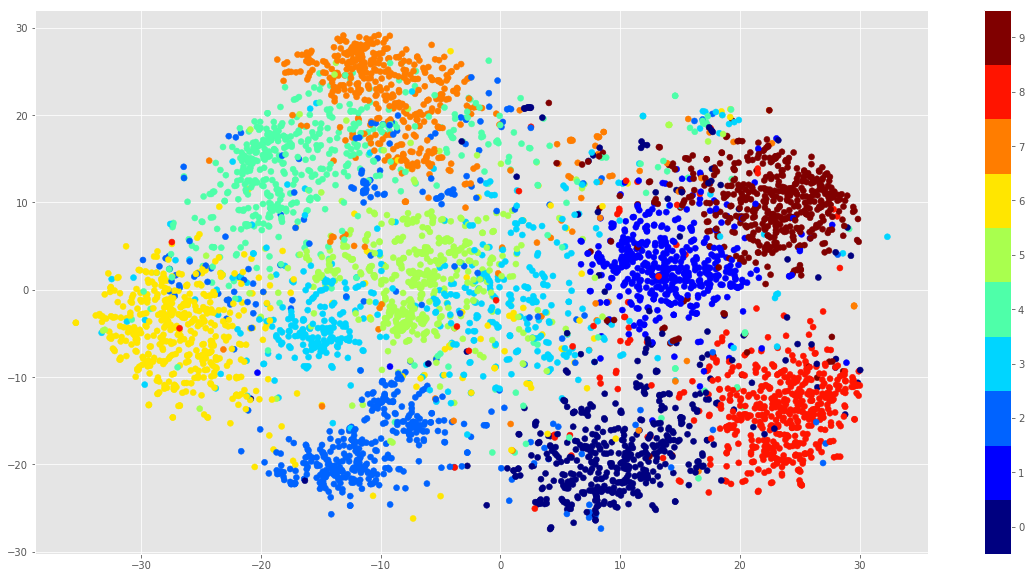

In [ ]:
# plot the features
plt.figure(figsize=(20,10))

plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels, cmap=plt.cm.get_cmap("jet", 10))

plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)

plt.show()

In [ ]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=1000)
tsne_results = tsne.fit_transform(features.reshape([features.shape[0], np.prod(features.shape[1:])]))

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.732s...
[t-SNE] Computed neighbors for 5000 samples in 163.136s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 3.343385
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.274536
[t-SNE] Error after 1000 iterations: 2.159836


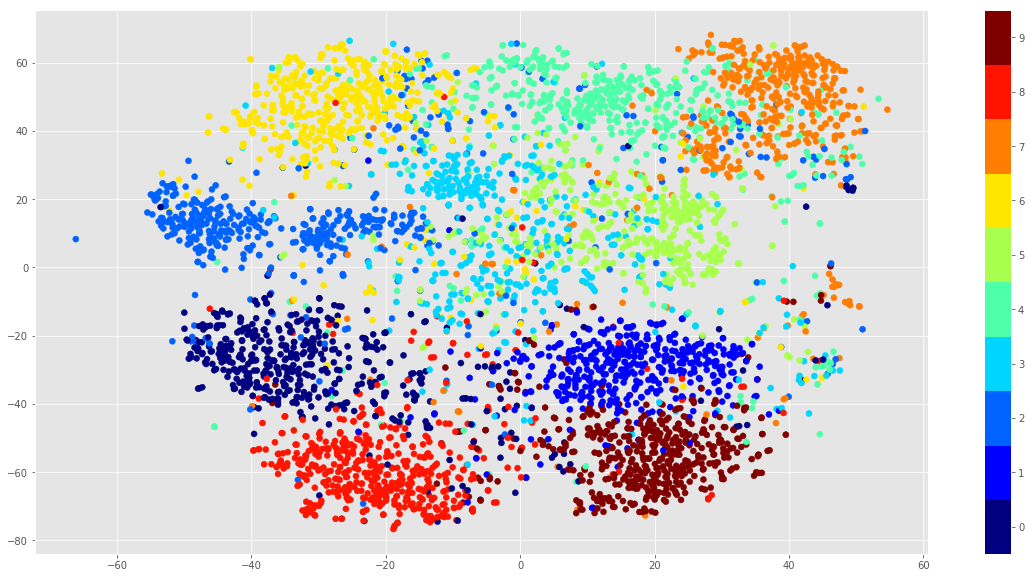

In [ ]:
# plot the features
plt.figure(figsize=(20,10))

plt.scatter(tsne_results[:,0], tsne_results[:,1], c=labels, cmap=plt.cm.get_cmap("jet", 10))

plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)

plt.show()

## Extract Bottleneck Features for Test Set

In [ ]:
big_x_test = np.array([scipy.misc.imresize(X_test[i], (299, 299, 3)) 
                            for i in range(0, len(X_test))]).astype('float32')

print(big_x_test.shape)

inception_input_test = preprocess_input(big_x_test)

features_test = model.predict(inception_input_test)

/home/root1/.virtualenv/demos/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


(5000, 299, 299, 3)


# Train a Shallow NN

In [ ]:
from keras.utils import np_utils

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
from keras.callbacks import ModelCheckpoint   
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, GlobalAveragePooling2D

final_model = Sequential()
final_model.add(Conv2D(filters=100, kernel_size=2, input_shape=features.shape[1:]))
final_model.add(Dropout(0.4))
final_model.add(GlobalAveragePooling2D())
final_model.add(Dropout(0.3))
final_model.add(Dense(10, activation='softmax'))
final_model.summary()

final_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

#checkpointer = ModelCheckpoint(filepath='model.best.hdf5', verbose=1, save_best_only=True)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_97 (Conv2D)           (None, 298, 298, 100)     1300      
_________________________________________________________________
dropout_1 (Dropout)          (None, 298, 298, 100)     0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 100)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 2,310.0
Trainable params: 2,310.0
Non-trainable params: 0.0
_________________________________________________________________


ValueError: Error when checking model input: expected conv2d_97_input to have 4 dimensions, but got array with shape (5000, 2048)

In [ ]:
# evaluate test accuracy
score = final_model.evaluate(features_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)